<center><bold>Eindopdracht voor computer vision, binaire classificatie van hersenscans</bold></center>

In [230]:
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape
from keras.datasets import cifar10
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from random import randint,seed
from time import time_ns

data_dir = "..\\data"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=486235864,
  image_size=(28, 32),
  batch_size=16)
images_train = []
labels_train = []
for images, labels in train_ds:
    images_train.append(images)
    labels_train.append(labels)

vals_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=486235864,
  image_size=(28, 32),
  batch_size=1)




Found 2800 files belonging to 2 classes.
Using 2240 files for training.
Found 2800 files belonging to 2 classes.
Using 560 files for validation.


In [231]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [232]:
model.fit(train_ds, epochs=20,validation_data= vals_ds)

Epoch 1/20
140/140 [==============================] - 4s 26ms/step - loss: 0.4440 - accuracy: 0.7982 - val_loss: 0.3438 - val_accuracy: 0.8750
Epoch 2/20
140/140 [==============================] - 4s 26ms/step - loss: 0.2645 - accuracy: 0.8996 - val_loss: 0.2126 - val_accuracy: 0.9321
Epoch 3/20
140/140 [==============================] - 4s 26ms/step - loss: 0.1544 - accuracy: 0.9455 - val_loss: 0.1374 - val_accuracy: 0.9571
Epoch 4/20
140/140 [==============================] - 4s 26ms/step - loss: 0.0735 - accuracy: 0.9759 - val_loss: 0.1974 - val_accuracy: 0.9232
Epoch 5/20
140/140 [==============================] - 4s 26ms/step - loss: 0.0791 - accuracy: 0.9732 - val_loss: 0.1193 - val_accuracy: 0.9625
Epoch 6/20
140/140 [==============================] - 4s 26ms/step - loss: 0.0574 - accuracy: 0.9777 - val_loss: 0.1241 - val_accuracy: 0.9607
Epoch 7/20
140/140 [==============================] - 4s 26ms/step - loss: 0.0240 - accuracy: 0.9933 - val_loss: 0.1014 - val_accuracy: 0.9643

In [233]:
test_loss, test_acc = model.evaluate(vals_ds, verbose=2)

560/560 - 1s - loss: 0.1293 - accuracy: 0.9821 - 1s/epoch - 2ms/step


In [234]:
print(test_acc)

0.9821428656578064


In [235]:
test_dir = "..\\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=486235864,
  image_size=(28, 32),
  batch_size=1)

test_loss, test_acc = model.evaluate(test_ds, verbose=2)



Found 200 files belonging to 2 classes.
200/200 - 1s - loss: 0.6706 - accuracy: 0.9350 - 530ms/epoch - 3ms/step


In [236]:
print(test_acc)

0.9350000023841858


In [237]:
def show_res(img,  res):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
    ax.imshow(img, cmap='gray')
    if(res == 1):
        ax.set_title('tumor', fontsize=10)
    elif(res == 0):
        ax.set_title('healty', fontsize=10)

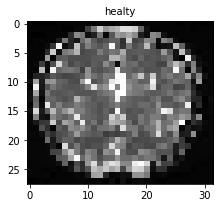

In [248]:
from skimage.color import rgb2gray
spull = test_ds.take(1)
images_test = []
labels_test = []
for images, labels in test_ds:
    images_test.append(images)
    labels_test.append(labels)
#plt.imshow(np.asanyarray(spull))
seed(time_ns())
test_IM = randint(0,len(images_test))
predictions = model.predict(images_test[test_IM])
img = images_test[test_IM]
img = np.squeeze(rgb2gray(img))

res = np.argmax(predictions)
show_res(img, res)
plt.show()






In [239]:
from sklearn import svm
from skimage.transform import resize
from os import listdir
from os.path import isfile, join
from random import shuffle, seed

yespath = '..\\data\\yes'
yesfiles = [f for f in listdir(yespath) if isfile(join(yespath, f))]

x = []
y = []

for file in yesfiles:
    img = plt.imread(f"..\\data\\yes\\{file}")
    img = resize(img, (28, 32,3),
                 anti_aliasing=True)
    x.append(rgb2gray(img).flatten())
    y.append('yes')


nopath = '..\\data\\no'
nofiles = [f for f in listdir(nopath) if isfile(join(nopath, f))]

for file in nofiles:
    img = plt.imread(f"..\\data\\no\\{file}")
    img = resize(img, (28, 32,3),
                 anti_aliasing=True)
    x.append(rgb2gray(img).flatten())
    y.append('no')


z = list(zip(x, y))  # zip so it stays together during shuffle
seed(7577947579)
shuffle(z)

x, y = zip(*z)


In [240]:
from sklearn import metrics
Svm = svm.SVC()
Svm.fit(x,y)

yespath = '..\\test\\yes'
yesfiles = [f for f in listdir(yespath) if isfile(join(yespath, f))]

x_test = []
y_test = []

for file in yesfiles:
    img = plt.imread(f"..\\test\\yes\\{file}")
    img = resize(img, (28, 32,3),
                 anti_aliasing=True)
    x_test.append(rgb2gray(img).flatten())
    y_test.append('yes')


nopath = '..\\test\\no'
nofiles = [f for f in listdir(nopath) if isfile(join(nopath, f))]

for file in nofiles:
    img = plt.imread(f"..\\test\\no\\{file}")
    img = resize(img, (28, 32,3),
                 anti_aliasing=True)
    x_test.append(rgb2gray(img).flatten())
    y_test.append('no')


z_test = list(zip(x_test, y_test))  # zip so it stays together during shuffle
seed(398475937597439)
shuffle(z_test)
x_test , y_test = zip(*z_test)

evaluation = metrics.accuracy_score(y_test,Svm.predict(x_test))
print(evaluation)



0.875
